# Usando MetaTrader

Biblioteca de data e tempo

In [ ]:
from datetime import datetime
import time

(ano, mês, dia, hora, minutos, segundos, microssegundo)

In [ ]:
datetime.now()

Biblioteca de fuso horário para definir horário do Brasil

In [ ]:
import pytz

Fuso horários disponíveis

In [ ]:
pytz.all_timezones

Testando fuso horário

In [ ]:
timezone = pytz.timezone("Brazil/West")
datetime.now(timezone)

Trocando de fuso horário

In [ ]:
timezone = pytz.timezone("Brazil/East")
datetime.now(timezone)

# Conexão com o MetaTrader5

In [ ]:
import MetaTrader5 as mt5

In [ ]:
if not mt5.initialize():
    print("erro: ",mt5.last_error())
    quit()

Datas que queremos capturar

In [ ]:
utc_from = datetime(2021, 6, 1, tzinfo=timezone)
utc_to = datetime(2021, 6, 16, tzinfo=timezone)

Capturando os dados no MetaTrader

In [ ]:
rates = mt5.copy_rates_range("PETR4", mt5.TIMEFRAME_D1, utc_from, utc_to)

Formato de array do numpy

In [ ]:
rates

Devemos transformar em DataFrame para melhorar a manipulação

In [ ]:
import pandas as pd

In [ ]:
rates_frame = pd.DataFrame(rates)

In [ ]:
rates_frame

Transformar o time em datetime

In [ ]:
rates_frame['time']=pd.to_datetime(rates_frame['time'], unit='s')

In [ ]:
rates_frame

Testando com diferentes timeframes

In [ ]:
# Período dos dados
utc_from = datetime(2021, 6, 1, tzinfo=timezone)
utc_to = datetime.now(timezone)

# Obeter os dados
rates = mt5.copy_rates_range("PETR4", mt5.TIMEFRAME_M1, utc_from, utc_to)

# Transformar
rates_frame = pd.DataFrame(rates)
rates_frame['time']=pd.to_datetime(rates_frame['time'], unit='s')

rates_frame

# Códigos de timeframes

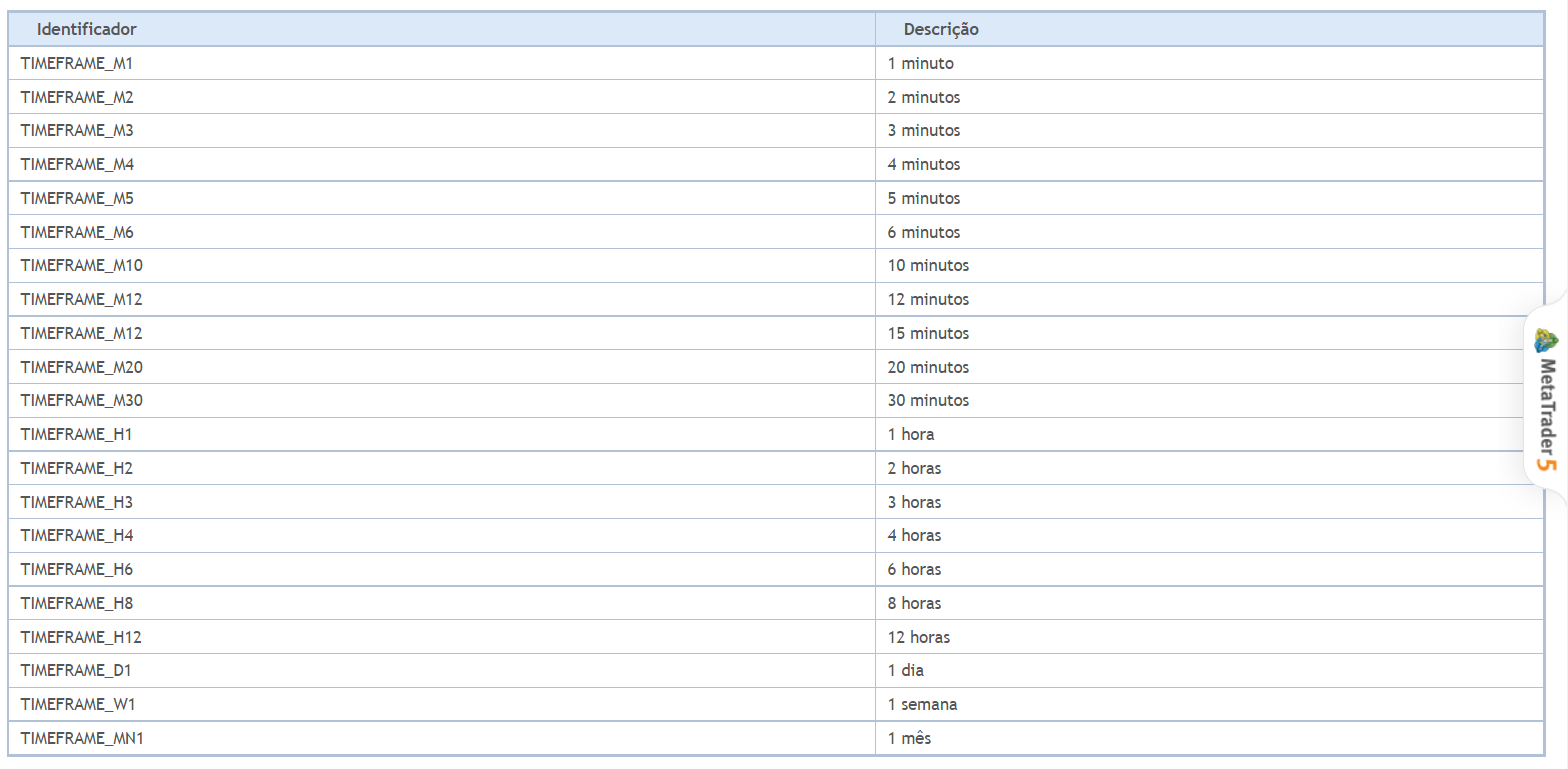

In [ ]:
# Obeter os dados
rates = mt5.copy_rates_range("PETR4", mt5.TIMEFRAME_D1, utc_from, utc_to)

# Transformar
rates_frame = pd.DataFrame(rates)
rates_frame['time']=pd.to_datetime(rates_frame['time'], unit='s')

rates_frame

# Adquirindo dados de outra forma

Número de dados

In [ ]:
rates = mt5.copy_rates_from_pos("PETR4", mt5.TIMEFRAME_M1,0, 50000)
# Transformar
rates_frame = pd.DataFrame(rates)
rates_frame['time']=pd.to_datetime(rates_frame['time'], unit='s')

rates_frame

Monitorar

In [ ]:
# Período dos dados
utc_from = datetime(2021, 6, 22, tzinfo=timezone)
papel = 'PETR4'

while True:
    
    utc_to = datetime.now(timezone)

    # Obeter os dados
    rates = mt5.copy_rates_range(papel, mt5.TIMEFRAME_M1, utc_from, utc_to)

    # Transformar
    rates_frame = pd.DataFrame(rates)
    rates_frame['time']=pd.to_datetime(rates_frame['time'], unit='s')
    
    pct = (rates_frame.iloc[-1]['close']/rates_frame.iloc[0]['open'] -1) * 100
    hora = rates_frame.iloc[-1]['time']
    preco = rates_frame.iloc[-1]['close']
    
    print(f'{hora}: O preço de {papel} é {preco} e variou {pct.round(2)} % da abertura de hoje.')
    
    time.sleep(1)

# Receber Notificações

In [ ]:
from notify_run import Notify

In [ ]:
notify = Notify()

Registrar no site para aceitar receber as notificações

In [ ]:
notify.register()

Testando o notify

In [ ]:
notify.send('teste')

Recuperar o endpoint

In [ ]:
notify.info()

Criar um trigger na programação que envia a notificação

In [ ]:
# Período dos dados
utc_from = datetime(2021, 6, 22, tzinfo=timezone)
papel = 'PETR4'

while True:
    
    utc_to = datetime.now(timezone)
    # Obeter os dados
    rates = mt5.copy_rates_range(papel, mt5.TIMEFRAME_M1, utc_from, utc_to)

    # Transformar
    rates_frame = pd.DataFrame(rates)
    rates_frame['time']=pd.to_datetime(rates_frame['time'], unit='s')
    
    pct = (rates_frame.iloc[-1]['close']/rates_frame.iloc[0]['open'] -1) * 100
    hora = rates_frame.iloc[-1]['time']
    preco = rates_frame.iloc[-1]['close']

    mensagem = f'{hora}: O preço de {papel} é {preco} e variou {pct.round(2)} % da abertura de hoje.'
    
    if preco >= 28.93:
        
        notify.send(mensagem)
        print('notificação enviada')
        
        break
    else:
        print(mensagem)
    
    time.sleep(1)